# 深度学习实验六:大模型迁移学习

本次实验练习将大规模数据集上训练的模型迁移到新的任务上。

In [80]:
name = '王浩南'#填写你的姓名
sid = 'E02014154'#填写你的学号

print('姓名:%s, 学号:%s'%(name, sid))

姓名:王浩南, 学号:E02014154


In [81]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# 1. 准备数据

本次实验的训练样本存放在磁盘的./data./flower_photos目录中，其中train目录中是训练样本，test目录中是测试样本。

请使用```torchvision.datasets.ImageFolder```类构造样本集。

本实验将ImageNet上训练的resnet模型迁移到本实验任务中，因此需要对图像做以下Normalize预处理：像素均值为$[0.485,0.456,0.406]$,标准差为$[0.229,0.224,0.225]$.resnet模型的输入图像尺寸为$224\times224$，请选择合适的增广变换，将原始样本变换为同样尺寸的训练样本。

In [82]:
from torchvision import datasets,transforms

In [83]:
#在下面构造合适的变换
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [84]:
#构造训练集和测试集dataset
data_path = './data/flower_photos'
flower_train = datasets.ImageFolder(data_path, transform = transform)#一行代码 
flower_test = datasets.ImageFolder(data_path, transform = transform) #一行代码

In [85]:
flower_train

Dataset ImageFolder
    Number of datapoints: 3670
    Root location: ./data/flower_photos
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

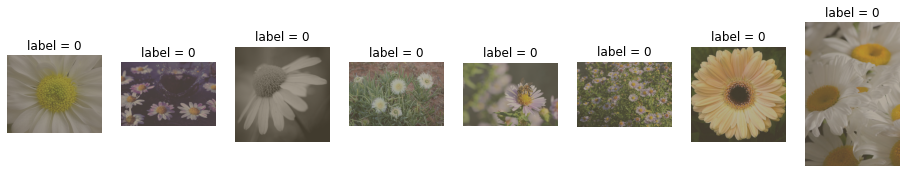

In [86]:
#显示图像样本
flower_iter = iter(flower_test)
plt.figure(figsize = [16,10])
for i in range(8):
    im,label = next(flower_iter)

    im = im.permute((1,2,0))
    im = im * torch.tensor([[[0.229,0.224,0.225]]]) + torch.tensor([[[0.485,0.456,0.406]]])
    plt.subplot(1,8,i+1)
    plt.imshow(im)
    plt.title('label = %d'%(label))
    plt.axis('off')
    
plt.show()

# 2. 使用ResNet迁移学习

将Resnet用于本实验的花卉识别。PyTorch中提供了若干ResNet模型及其预训练权重，其中的预训练权重可以从以下地址下载：

```
model_urls = {
    'resnet18': 'https://download.pytorch.org/models/resnet18-5c106cde.pth',
    'resnet34': 'https://download.pytorch.org/models/resnet34-333f7ec4.pth',
    'resnet50': 'https://download.pytorch.org/models/resnet50-19c8e357.pth',
    'resnet101': 'https://download.pytorch.org/models/resnet101-5d3b4d8f.pth',
    'resnet152': 'https://download.pytorch.org/models/resnet152-b121ed2d.pth',
    'resnext50_32x4d': 'https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth',
    'resnext101_32x8d': 'https://download.pytorch.org/models/resnext101_32x8d-8ba56ff5.pth',
    'wide_resnet50_2': 'https://download.pytorch.org/models/wide_resnet50_2-95faca4d.pth',
    'wide_resnet101_2': 'https://download.pytorch.org/models/wide_resnet101_2-32ee1156.pth',
}
```
resnet网络结构可以参考以下页面：https://pytorch.org/vision/0.8/_modules/torchvision/models/resnet.html

本次实验根据你的电脑性能，可以选择resnet18/34/50作为迁移模型。

In [87]:
import torchvision.models as models

In [ ]:
#在下面添加代码，实现一个模型,注意该模型中使用resnet作为特征提取器，并添加你自己设计的分类网络用于图像分类
#请自行选择resnet中用于微调的层
#注意要加载预训练权重
class MyModel(torch.nn.Module):
    '''在下面补充代码'''
    

In [ ]:
#测试MyModel类
X = torch.rand((10,3,224,224),dtype = torch.float32)
net = MyModel(num_classes = 5)
Y = net(X)
print(Y.shape)

In [ ]:
#输出模型
print(net)

In [ ]:
%pip install -i https://pypi.tuna.tsinghua.edu.cn/simple torchsummary

In [ ]:
from torchsummary import summary

summary(net, input_size = (3,224,224))

# 3.训练模型

# 3.1 第一步，构造加载器，用于加载上面定义的数据集

In [ ]:
#在下面构造训练集和测试集加载器
#自行设定batch_size大小

train_loader = #一行代码
test_loader = #一行代码

In [ ]:
imgs,labels = next(iter(train_loader))

In [ ]:
imgs.shape

In [ ]:
labels.shape

# 3.2 第二步，训练模型

注意：训练卷积神经网络时，网络的输入是四维张量，尺寸为$N\times C \times H \times W$，分别表示张量

In [ ]:
def Train(model, loader, epochs, lr = 0.001):
    epsilon = 1e-7
    
    model.train()
    
    optimizer = optim.RMSprop(model.parameters(), lr = lr)
    loss = nn.CrossEntropyLoss()
    
    loss0 = 0
    for epoch in range(epochs):
        for it,(imgs, labels) in enumerate(loader):
            #1. zero_grads
            optimizer.zero_grad()
            
            #2. F.P.
            logits = model(imgs)
            
            #3. Loss
            loss1 = loss(logits,labels)
            
#             if(abs(loss1.item() - loss0)<epsilon):
#                 break
                
            loss0 = loss1.item()
                
            if it%10==0:
                print('epoch %d, iter %d, loss = %f\n'%(epoch,it,loss1.item()))
                
            #4. B.P.
            loss1.backward()
            
            #5. G.D.
            optimizer.step()
            
    return model            

In [ ]:
model = MyModel(5)

model = Train(model, test_loader, 10)

In [ ]:
#在下面添加代码，保存训练结果


# 3.3 第三步，测试模型

In [ ]:
#编写模型测试过程
def Evaluate(model, loader):
    model.eval()
    correct = 0
    counts = 0
    with torch.no_grad():
        for imgs, labels in loader:
            logits = model(imgs)
            yhat = logits.argmax(dim = 1)
            correct = correct + (yhat==labels).sum().item()
            counts = counts + imgs.size(0)
    
    accuracy = correct / counts
    
    return accuracy

In [ ]:
#在下面统计训练集与测试集的识别准确率

train_acc = #一行代码
print('Training Accuracy = %f'%(train_acc))

test_acc = #一行代码
print('Test Accuracy = %f'%(test_acc))

根据上述准确率指标，判断你的模型是否发生过拟合或欠拟合？在下面写出你的分析。



In [ ]:
#展示部分预测结果
imgs,labels  = next(iter(test_loader))

logits = model(imgs)
yhat = logits.argmax(dim = 1)
imgs = imgs.permute((0,2,3,1))
plt.figure(figsize = (16,10))
for i in range(imgs.size(0)):
    plt.subplot(4,8,i+1)
    plt.imshow(imgs[i]/2+0.5,cmap = 'gray')
    plt.axis('off')
    plt.title('GT=%d, Pred = %d'%(labels[i],yhat[i]))
    
plt.show()

## 3.4 错误分析(选做)

### 3.4.1 统计混淆矩阵

In [ ]:
#在下面统计你的模型在训练集/测试集上的混淆矩阵


### 3.4.2 错误样本分析

In [ ]:
#在下面输出识别效果最差的类别的错误结果，并试着总结错误规律


经过对上述错误样本的分析，你觉得错误可能原因是什么？如何改进样本/模型？

